Przetwarzanie zestawu: Indian_pines_data.mat
Kształt danych: (145, 145, 200)


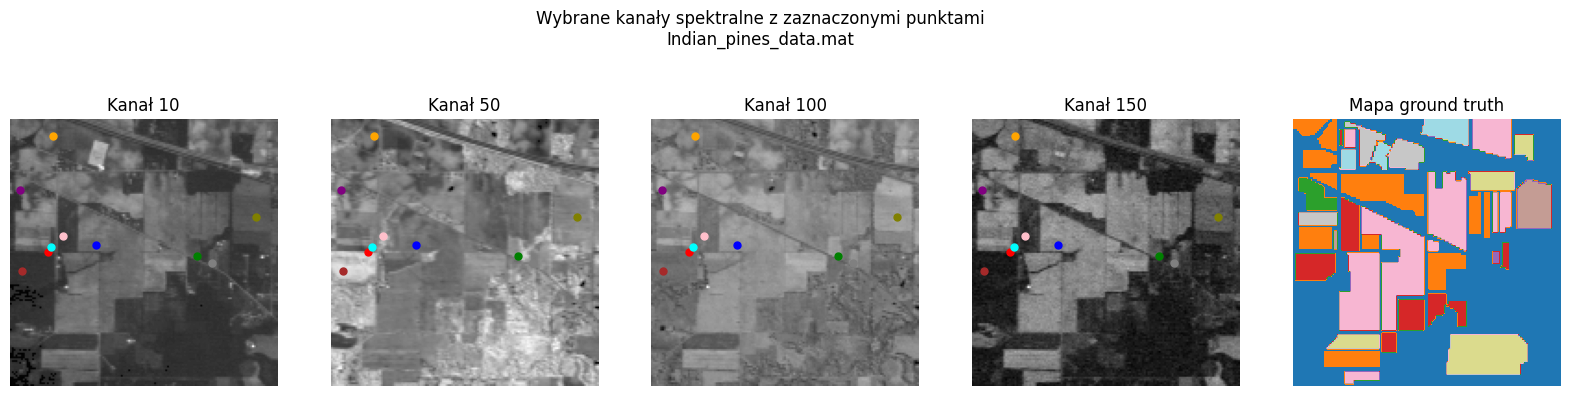

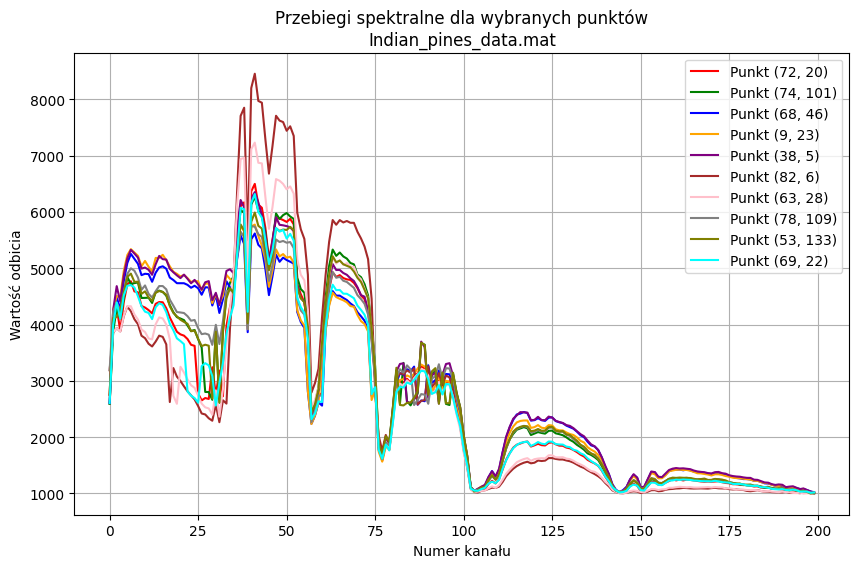

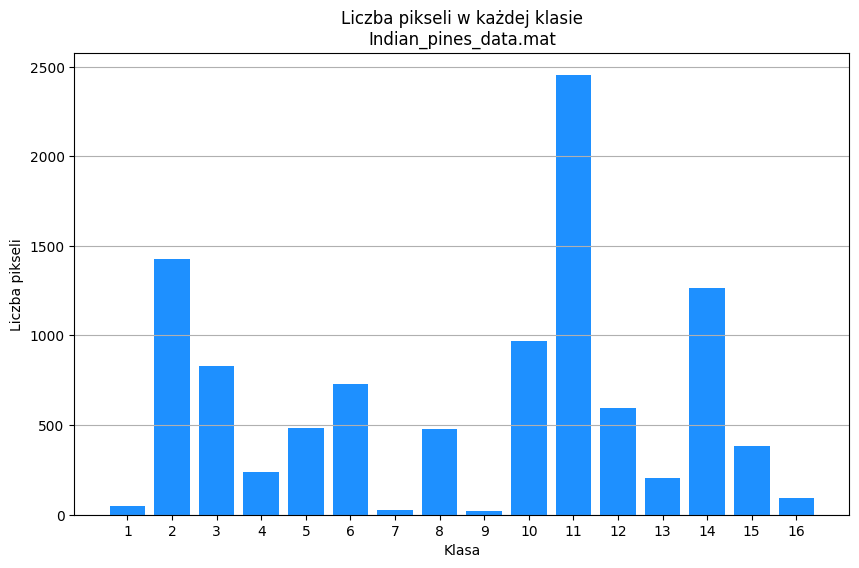

Przetwarzanie zestawu: Indian_pines_NS_data.mat
Kształt danych: (2678, 614, 220)


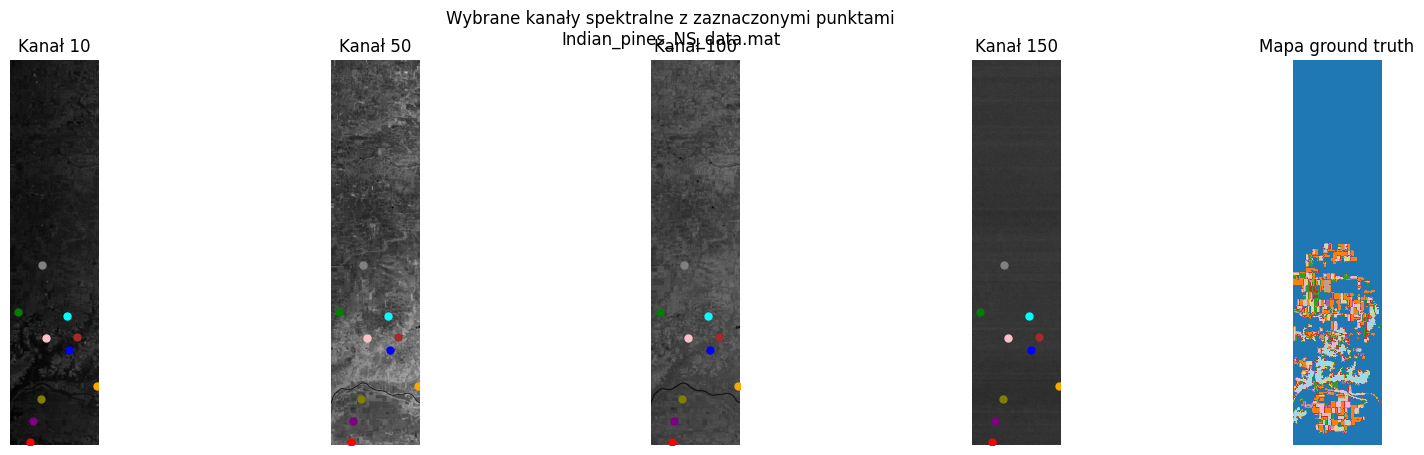

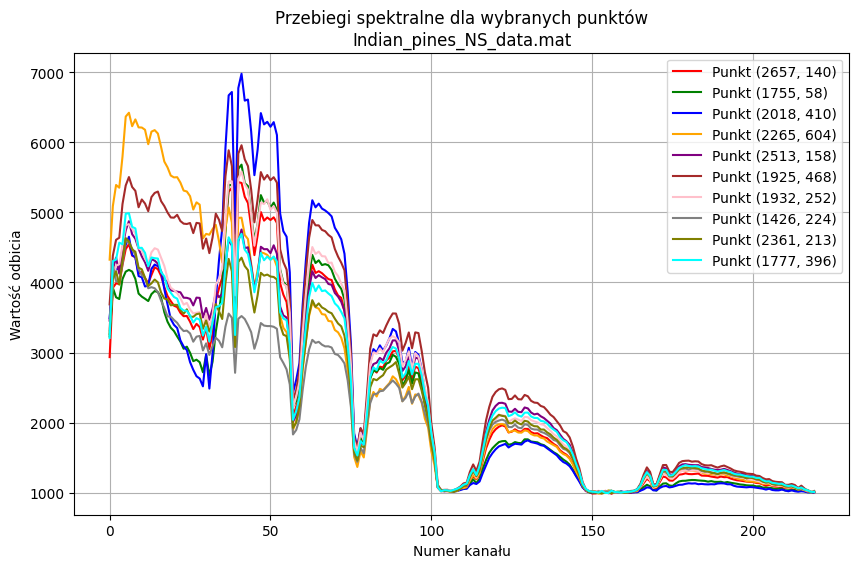

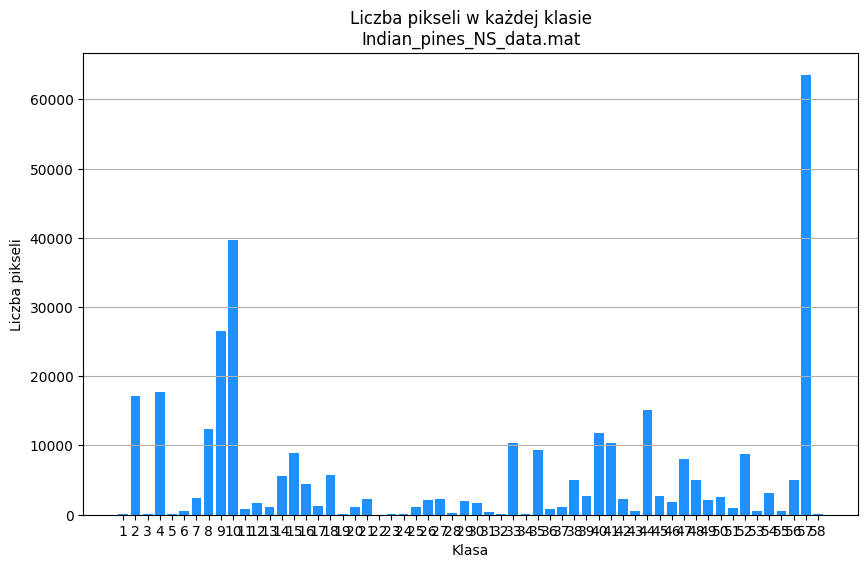

Przetwarzanie zestawu: Salinas_data.mat
Kształt danych: (512, 217, 204)


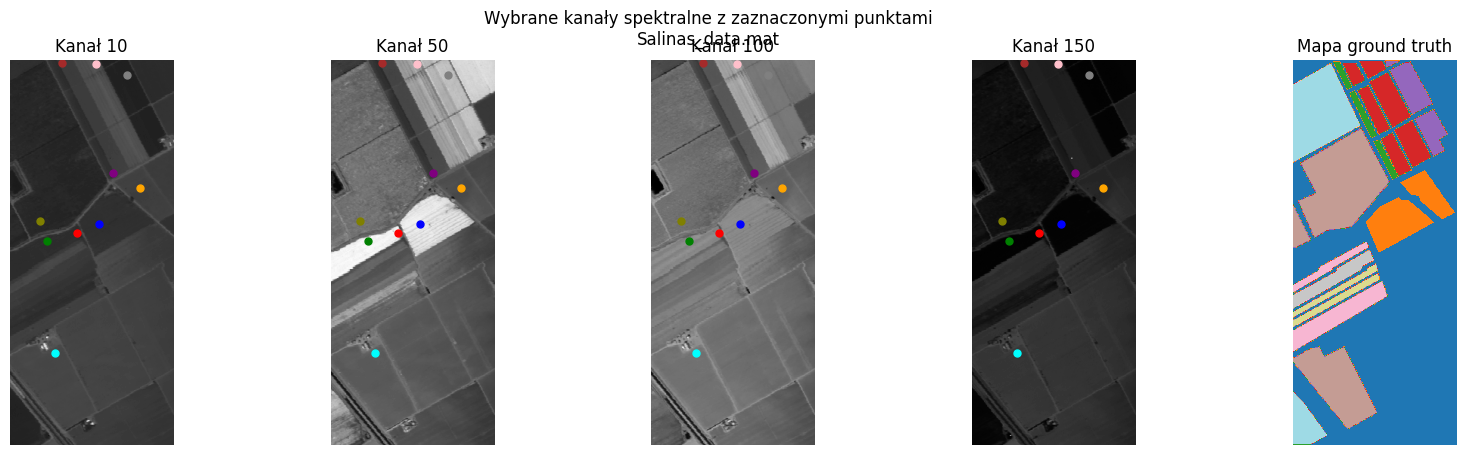

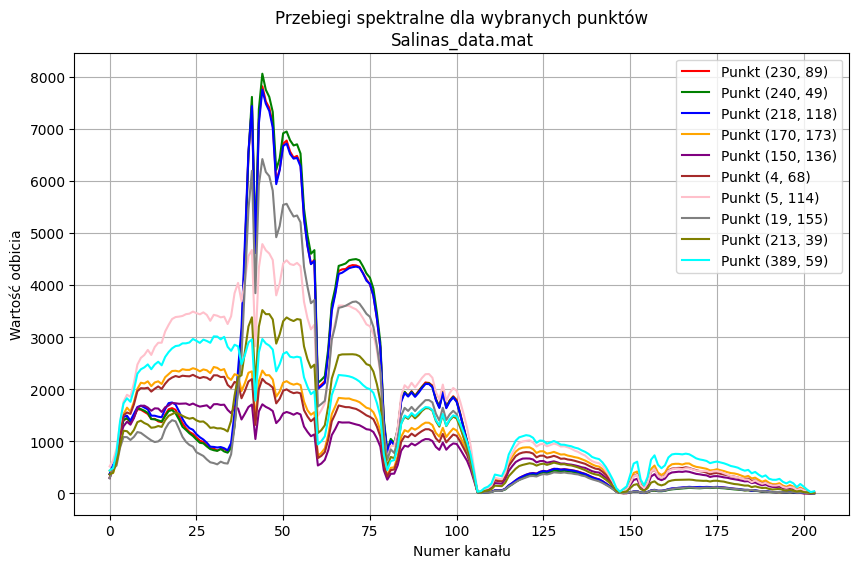

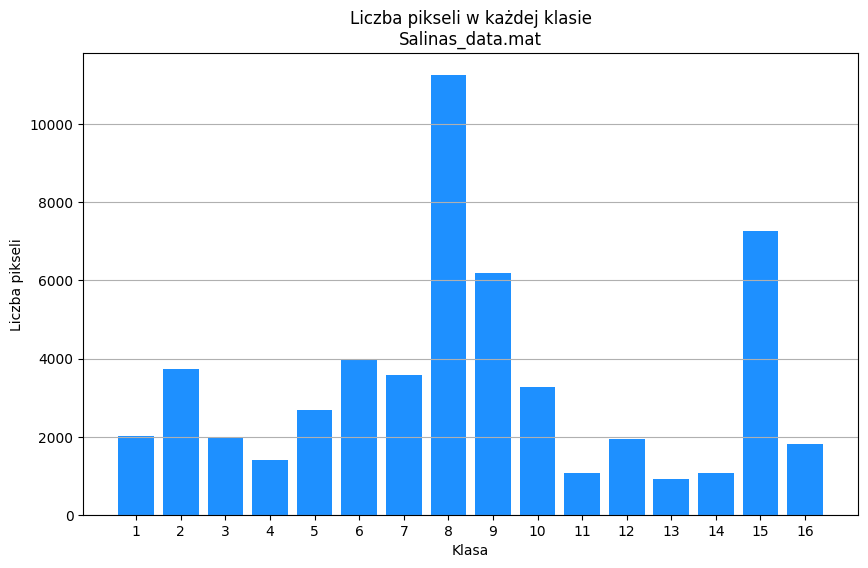

In [22]:
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def process_dataset(data_path, gt_path, selected_channels, colors, max_classes=10):
    # 1. Odczytanie plików .mat
    data = sio.loadmat(data_path)
    gt_data = sio.loadmat(gt_path)

    # Przypisanie danych do zmiennych
    hyper_data = data[list(data.keys())[-1]]  # Zakładam, że ostatni klucz to dane
    ground_truth = gt_data[list(gt_data.keys())[-1]]  # Zakładam, że ostatni klucz to ground truth

    # Sprawdzenie i przekształcenie wymiarów ground truth
    if ground_truth.ndim == 3 and ground_truth.shape[2] == 1:
        ground_truth = ground_truth.reshape((ground_truth.shape[0], ground_truth.shape[1]))

    # Zidentyfikowanie unikalnych klas i ograniczenie do max_classes
    unique_classes = np.unique(ground_truth)
    if len(unique_classes) > max_classes:
        unique_classes = unique_classes[:max_classes]

    # Losowy wybór jednego piksela z każdej klasy
    points = []
    for cls in unique_classes:
        indices = np.argwhere(ground_truth == cls)
        if len(indices) > 0:
            selected_point = indices[np.random.choice(indices.shape[0])]
            points.append((selected_point[0], selected_point[1]))

    # Sprawdzenie kształtu danych
    print(f'Kształt danych: {hyper_data.shape}')

    # 2. Wyświetlenie wybranych kanałów z zaznaczonymi punktami
    num_channels = len(selected_channels)
    fig, axs = plt.subplots(1, num_channels + 1, figsize=(20, 5))
    fig.suptitle(f'Wybrane kanały spektralne z zaznaczonymi punktami\n{os.path.basename(data_path)}')

    for i, ch in enumerate(selected_channels):
        axs[i].imshow(hyper_data[:, :, ch], cmap='gray')
        axs[i].set_title(f'Kanał {ch}')
        axs[i].axis('off')
        # Zaznaczanie punktów na obrazach kanałów
        for (x, y), color in zip(points, colors):
            axs[i].plot(y, x, 'o', markersize=5, color=color, label=f'Punkt ({x}, {y})' if i == 0 else "")

    # 3. Wyświetlenie mapy ground truth
    num_classes = len(unique_classes)
    cmap = ListedColormap(plt.colormaps['tab20'].resampled(num_classes).colors)

    axs[-1].imshow(ground_truth, cmap=cmap)
    axs[-1].set_title('Mapa ground truth')
    axs[-1].axis('off')

    plt.show()

    # 4. Wyświetlenie przebiegów spektralnych dla wybranych punktów
    plt.figure(figsize=(10, 6))

    for (x, y), color in zip(points, colors):
        pixel_spectrum = hyper_data[x, y, :]
        channels = np.arange(pixel_spectrum.shape[0])
        plt.plot(channels, pixel_spectrum, label=f'Punkt ({x}, {y})', color=color)

    plt.xlabel('Numer kanału')
    plt.ylabel('Wartość odbicia')
    plt.title(f'Przebiegi spektralne dla wybranych punktów\n{os.path.basename(data_path)}')
    plt.legend()
    plt.grid(True)
    plt.show()

      # 5. Zliczenie liczby pikseli dla każdej klasy i wyświetlenie wykresu słupkowego
    unique_classes, counts = np.unique(ground_truth, return_counts=True)
    unique_classes = unique_classes[1:]
    counts = counts[1:]
    plt.figure(figsize=(10, 6))
    plt.bar(unique_classes, counts, color='dodgerblue')
    plt.xlabel('Klasa')
    plt.ylabel('Liczba pikseli')
    plt.title(f'Liczba pikseli w każdej klasie\n{os.path.basename(data_path)}')
    plt.xticks(unique_classes)
    plt.grid(axis='y')
    plt.show()

def main(data_folder, gt_folder, selected_channels, colors, max_classes=10):
    # Przeglądanie wszystkich plików w folderze danych
    for data_filename in os.listdir(data_folder):
        if data_filename.endswith('.mat'):
            data_path = os.path.join(data_folder, data_filename)
            # Zakładam, że plik ground truth ma podobną nazwę jak plik danych
            gt_filename = data_filename.replace('data', 'gt')
            gt_path = os.path.join(gt_folder, gt_filename)
            if os.path.exists(gt_path):
                print(f'Przetwarzanie zestawu: {data_filename}')
                process_dataset(data_path, gt_path, selected_channels, colors, max_classes)
            else:
                print(f'Brak odpowiadającego pliku ground truth dla {data_filename}')

# Parametry
data_folder = '../data/data'
gt_folder = '../data/gt'
selected_channels = [10, 50, 100, 150]  # Przykładowe kanały
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

if __name__ == '__main__':
    main(data_folder, gt_folder, selected_channels, colors)
